In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_csv = pd.read_csv(mouse_drug_data_to_load)
trial_csv = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
mouse_df = pd.DataFrame(mouse_csv)
trial_df = pd.DataFrame(trial_csv)
mouse_trial_df = pd.merge(trial_df, mouse_df).round(2)

# Display the data table for preview
mouse_trial_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.00,0,Capomulin
1,b128,5,45.65,0,Capomulin
2,b128,10,43.27,0,Capomulin
3,b128,15,43.78,0,Capomulin
4,b128,20,42.73,0,Capomulin


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumor_response_df1 = mouse_trial_df[['Drug', 'Timepoint', 'Tumor Volume (mm3)']]
tumor_response_df1 = tumor_response_df1.groupby(['Drug', 'Timepoint'], as_index=False).mean()

# Preview DataFrame
tumor_response_df1.head(11)

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.265600
2,Capomulin,10,43.083600
3,Capomulin,15,42.063333
4,Capomulin,20,40.717391
5,Capomulin,25,39.940000
6,Capomulin,30,38.769091
7,Capomulin,35,37.816818
8,Capomulin,40,36.958095
9,Capomulin,45,36.236190


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_response_df2 = mouse_trial_df[['Drug', 'Timepoint', 'Tumor Volume (mm3)']]
tumor_response_df2 = tumor_response_df2.groupby(['Drug', 'Timepoint']).sem().reset_index()
# tumor_response_df2.reset_index()

# Preview DataFrame
tumor_response_df2.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448570
2,Capomulin,10,0.702694
3,Capomulin,15,0.838700
4,Capomulin,20,0.909475


In [4]:
########## These are slightly off 


# Minor Data Munging to Re-Format the Data Frames
tumor_response_plot = tumor_response_df1.pivot(index='Timepoint', columns='Drug') #used for plotting
tumor_response_df3 = tumor_response_df1.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')

# Preview that Reformatting worked
tumor_response_df3.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.00000,45.000000,45.000000
5,44.265600,46.503333,47.061600,47.388261,46.796957,47.126250,47.248000,43.94600,47.526800,46.851250
10,43.083600,48.284000,49.403333,49.582727,48.694286,49.422917,49.102609,42.53125,49.463913,48.690000
15,42.063333,50.093684,51.296667,52.400526,50.932857,51.360000,51.067647,41.49500,51.530435,50.778571
20,40.717391,52.157778,53.198000,54.922105,53.643000,54.365263,53.346471,40.24000,54.067619,53.169412


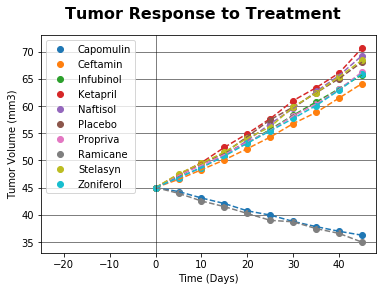

In [40]:
# Generate the Plot (with Error Bars)
fig, treatment = plt.subplots()

#plot titles and grids
fig.suptitle('Tumor Response to Treatment', fontsize=16, fontweight='bold')

treatment.set_xlim(-25, 48)
treatment.set_ylim(33, 73)

treatment.set_xlabel('Time (Days)')
treatment.set_ylabel('Tumor Volume (mm3)')
treatment.yaxis.grid(linestyle='-', linewidth='0.5', color='black')
x_axis = np.arange(0, 50, 5)

#legend formatting
tr_labels = list(tumor_response_plot.columns.values)
tr_labels2 = []
for x in tr_labels:
    tr_labels2.append(x[1])
    
#plot
y_axis = tumor_response_plot['Tumor Volume (mm3)']
treatment.plot(x_axis, y_axis, linewidth=0, marker='o')
treatment.plot(x_axis, y_axis, '--')

#final formatting
treatment.legend(tr_labels2, loc='upper left')
treatment.axvline(linestyle='-', linewidth='0.5', color='black')
treatment.yaxis.set_ticks(np.arange(35, 75, 5))

# Save the Figure
plt.savefig('treatment.png')

# Show the Figure
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [6]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
met_response_df1 = mouse_trial_df[['Drug', 'Timepoint', 'Metastatic Sites']]
met_response_df1 = met_response_df1.groupby(['Drug', 'Timepoint']).mean()

# Preview DataFrame
met_response_df1.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [7]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
met_response_df2 = mouse_trial_df[['Drug', 'Timepoint', 'Metastatic Sites']]
met_response_df2 = met_response_df2.groupby(['Drug', 'Timepoint']).sem()

# Preview DataFrame
met_response_df2.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [8]:
########## Is the example incorrect? I thought I did this correctly

# Minor Data Munging to Re-Format the Data Frames

met_response_df3 = mouse_trial_df[['Drug', 'Timepoint', 'Metastatic Sites']]
met_response_df3 = met_response_df3.groupby(['Drug', 'Timepoint'], as_index=False).mean()
met_response_plot = met_response_df3.pivot(index='Timepoint', columns='Drug') #used for plotting
met_response_df3 = met_response_df3.pivot(index='Timepoint', columns='Drug', values='Metastatic Sites')

# Preview that Reformatting worked
met_response_df3.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


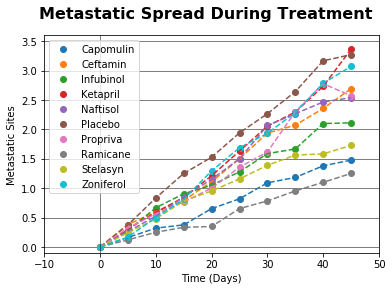

In [41]:
# Generate the Plot (with Error Bars) Metastatic Spread During Treatment
fig, spread = plt.subplots()

#plot titles and grids
fig.suptitle('Metastatic Spread During Treatment', fontsize=16, fontweight='bold')

spread.set_xlim(-10, 50)
spread.set_ylim(-0.1, 3.6)

spread.set_xlabel('Time (Days)')
spread.set_ylabel('Metastatic Sites')
spread.yaxis.grid(linestyle='-', linewidth='0.5', color='black')
x_axis = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45] 

#legend format
met_labels = list(met_response_plot.columns.values)
met_labels2 = []
for x in met_labels:
    met_labels2.append(x[1])

#plot
y_axis = met_response_plot['Metastatic Sites']
spread.plot(x_axis, y_axis, linewidth=0, marker='o')
spread.plot(x_axis, y_axis, '--')

#final formatting
spread.legend(met_labels2, loc='upper left')
spread.axvline(linestyle='-', linewidth='0.5', color='black')
spread.yaxis.set_ticks(np.arange(0, 4, 0.5))

# Save the Figure
plt.savefig('spread.png')

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [10]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
surv_rates_df1 = mouse_trial_df[['Drug', 'Timepoint', 'Mouse ID']]
surv_rates_df1 = surv_rates_df1.groupby(['Drug', 'Timepoint'], as_index=False).count()

# Preview DataFrame
surv_rates_df1.head()

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [47]:
# Minor Data Munging to Re-Format the Data Frames
#used for plotting
surv_rates_plot = surv_rates_df1.pivot(index='Timepoint', columns='Drug') 
surv_rates_df2 = surv_rates_df1.pivot(index='Timepoint', columns='Drug', values='Mouse ID')
# Preview the Data Frame
surv_rates_df2

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


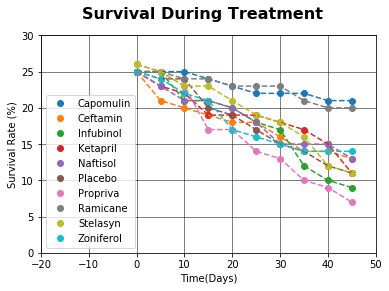

In [48]:
# Generate the Plot (Accounting for percentages)
fig, survival = plt.subplots()

#plot titles and grid
fig.suptitle('Survival During Treatment', fontsize=16, fontweight='bold')

survival.set_xlim(-20, 50) 
survival.set_ylim(0, 30) # should be 30, 105

survival.set_xlabel('Time(Days)')
survival.set_ylabel('Survival Rate (%)')
survival.grid(linestyle='-', linewidth='0.5', color='black')
x_axis = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45] 

#legend format
surv_labels = list(surv_rates_plot.columns.values)
surv_labels2 = []
for x in surv_labels:
    surv_labels2.append(x[1])

#plot
y_axis = surv_rates_plot['Mouse ID']
survival.plot(x_axis, y_axis, linewidth=0, marker='o')
survival.plot(x_axis, y_axis, '--')

#final formatting
survival.legend(surv_labels2, loc='lower left')

# Save the Figure
plt.savefig('survival.png')

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [20]:
# Calculate the percent changes for each drug
pct_change_df = tumor_response_df3.pct_change()*1000
pct_change_df = pct_change_df.iloc[-1]

# Display the data to confirm 
pct_change_df

Drug
Capomulin   -19.533062
Ceftamin     43.334540
Infubinol    41.046588
Ketapril     69.534635
Naftisol     55.865031
Placebo      46.595233
Propriva     50.981923
Ramicane    -44.226011
Stelasyn     47.175913
Zoniferol    48.374828
Name: 45, dtype: float64

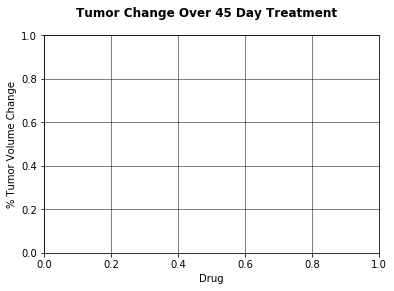

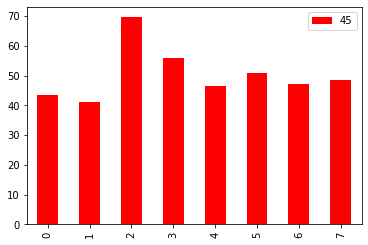

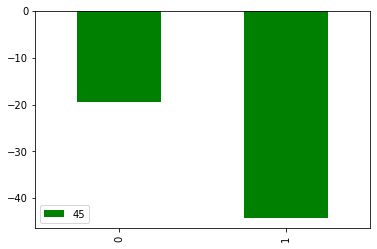

In [53]:
# Store all Relevant Percent Changes into a Tuple
pct_change_df2 = pct_change_df

# Splice the data between passing and failing drugs
x = 0

pct_change_pass = pd.DataFrame(pct_change_df2[pct_change_df2 >= x].dropna()).reset_index()
pct_change_fail = pd.DataFrame(pct_change_df2[pct_change_df2 < x].dropna()).reset_index()

# Orient widths. Add labels, tick marks, etc. 
fig, summary = plt.subplots()

fig.suptitle('Tumor Change Over 45 Day Treatment', fontsize=12, fontweight='bold')
summary.set_xlabel('Drug')
summary.set_ylabel('% Tumor Volume Change')
summary.grid(linestyle='-', linewidth='0.5', color='black')

# Plot
x_axis = list(pct_change_df1['Drug'])

# Save the Figure
# plt.savefig('summary.png')

# Show the Figure
# fig.show()

# Graphs of spliced data
pct_change_pass.plot.bar(color='r')
pct_change_fail.plot.bar(color='g')

![Metastatic Spread During Treatment](../Images/change.png)